In [ ]:
################## GPU  BASED ITERATION SEGMENTATION USING TRADITIONAL COMPUTER VISION ##############

In [20]:
!pip install pillow
!pip install tabulate

In [21]:
#UNISNSTALL EXISTING NUMPY MAHATOS AND RE-INSALL IT BEFORE RUNNING THIS ?make sure you have a numpy1.24 or above

In [22]:
#!pip uninstall numpy mahotas -y     ## run this two times just to make sure

In [23]:
#!pip uninstall numpy mahotas -y 

In [24]:
#!pip install numpy mahotas


In [25]:
# Import necessary libraries
import os
import cv2
import time
import shutil
import random
import inspect
#import imageio as im
import numpy as np
import mahotas as mh
from PIL import Image
from tabulate import tabulate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
#from skimage import measure, filters


In [26]:
#!pip install --upgrade mahotas

In [27]:
####################### EXCEPT FOR RAW DATA I ALWAYS USE FRESH DIRECTORIES #############################

In [28]:
# original directory path and working directory path for images
data = "/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/raw_files"
working_dir = "/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir"

In [29]:
################### THE BELOW ARE TEST DIRECTORIES THEY CHANGE BASED ON TESTS  #########################

In [30]:
experiment = "test2" # you can change this according to your needs. to access that data.
#current experiments are in test2

In [31]:
real = f"{working_dir}/{experiment}/real_images"
#########################################################################################################

directories = {
    "normalized": f"{working_dir}/{experiment}/normalized_images",
    "cropped": f"{working_dir}/{experiment}/cropped_images",
    "npy": f"{working_dir}/{experiment}/pre_processing/npy",
    "originals": f"{working_dir}/{experiment}/pre_processing/originals",
    "masks": f"{working_dir}/{experiment}/pre_processing/masks",
    "test": f"{working_dir}/{experiment}/pre_processing/test",
    "s": f"{working_dir}/{experiment}/S",
    "crop_original": f"{working_dir}/{experiment}/pre_processing/crop_originals",
    "crop_masks": f"{working_dir}/{experiment}/pre_processing/crop_masks"
}

In [5]:
###############################################functions
start_time = 0  # Define start_time in the global scope

def starttime():
    global start_time  # Use the global keyword to access the global start_time variable
    start_time = time.time()
    #hint: starttime() - To start timer.
    
def endtime():
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time:.2f} seconds")
    #hint: endtime() - To end timer

def check(path):
    # Create the directory if it does not exist
    os.makedirs(path, exist_ok=True)

    # Remove the directory and all its contents
    shutil.rmtree(path)

    # Create a new empty directory
    os.mkdir(path)
    #hint: check(path) - To recreate a particular path
            
def heavycrop(test):
    starttime()
    for z in tqdm(sorted(os.listdir(test))):
        if z.endswith("tif"):
            # Read in the image
            img = mh.imread(os.path.join(test, z))

            # Calculate the number of crops in each dimension
            height, width = img.shape[:2]
            num_crops_y = height // 512
            num_crops_x = width // 512

            for i in range(num_crops_y):
                for j in range(num_crops_x):
                    # Crop the image
                    start_y = i * 512
                    start_x = j * 512
                    img_cropped = img[start_y:start_y+512, start_x:start_x+512]

                    # Create a new file name for the cropped image
                    file_name, file_ext = os.path.splitext(z)
                    new_file_name = f"{file_name}_{i}_{j}{file_ext}"

                    # Save only if cropped image has shape (512, 512)
                    if img_cropped.shape == (512, 512):
                        mh.imsave(os.path.join(test, new_file_name), img_cropped)
                    else:
                        print(f"Warning: Cropped image has unexpected shape {img_cropped.shape}")
                        
            endtime()
            # Remove original image file after cropping is done.
            os.remove(os.path.join(test,z))
            #hint: heavycrop(spath) - To heavy crop all images 512x512
            
def npyconversion(tif_dir, npy_path):
    tif_files = [f for f in os.listdir(tif_dir) if f.endswith('.tif')]
    data = []
    for tif_file in tqdm(tif_files):
        img = Image.open(os.path.join(tif_dir, tif_file))
        data.append(np.array(img))
    np.save(npy_path, data)
    #hint: npyconversion(path , npy + '/filename.npy' ) -To create NPY files
            
def a2bcopy(path1, path2):
    for z in tqdm(sorted(os.listdir(path1))):
        if z.endswith("tif"):
            shutil.copy(os.path.join(path1, z), os.path.join(path2, z))
            #hint: a2bcopy(sorce path, dest path) - To copy all images
            
def crop(test):
    for z in tqdm(sorted(os.listdir(test))):
        if (z.endswith("tif")): # checking the file ends with tif
            # Read in the image
            img = mh.imread(os.path.join(test, z))
            img_cropped = img[1000:2500, 2500:4500]
            mh.imsave(os.path.join(test, z), img_cropped)
            print(z)
            #hint: crop(spath) - To crop all images
    
def a2brandom(src_dir, dst_dir, number):
    # Get a list of all image files in the source directory
    image_files = [f for f in tqdm(os.listdir(src_dir)) if f.endswith('.tif')]
    # Randomly select 10 images from the list
    selected_images = random.sample(image_files, number)
    # Copy the selected images to the destination directory
    for image in selected_images:
        src_path = os.path.join(src_dir, image)
        dst_path = os.path.join(dst_dir, image)
        shutil.copy2(src_path, dst_path)
    # Print a message when done
    print('Copied 10 random images to', dst_dir)
    #hint: a2brandom(sorce path, dest path, random number) - To copy n random images
    
def count_files(dir_path):
    if os.path.isdir(dir_path):
        file_count = 0
        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            file_size_bytes = os.path.getsize(file_path)
            file_size_mb = round(file_size_bytes / (1024 * 1024), 2)
            #print(f'{file_name} - Size: {file_size_mb} MB')
            file_count += 1
        return file_count
    else:
        print(f"{dir_path} is not a valid directory")
        return 0    
        #hint: count_files(path) - To count number of files in that path
    
def norm(path):
    for z in tqdm(sorted(os.listdir(path))):# added interactive progressbar to decrease the uncertanity and to increase curiosity :)
        if (z.endswith("tif")): # checking the file ends with tif 
            img = mh.imread(os.path.join(path, z))            
            # Normalize the image
            img = img.astype(np.float64)
            img /= img.max()
            img *= 255            
            # Save the processed image back to the temporary directory
            mh.imsave(os.path.join(path, z), img)
            #hint: norm(path) - To normalize all the images in the path
            
def shape(raw):
    for z in tqdm(sorted(os.listdir(raw))):
        if (z.endswith("tif")):
            img = mh.imread(os.path.join(raw, z))
            print (img.shape)
            #hint: shape(path) _ To print shape of all the images in the path
            
def refresh(experiment: str, directories: dict):
    for key in directories:
        if os.path.exists(directories[key]):
            shutil.rmtree(directories[key])
        os.makedirs(directories[key])
        #hint: refresh("experiment name", directories) - to recreate all directories in that dict
        
def paths(directories):
    for key, value in directories.items():
        globals()[key] = value
    return directories
    #hint: paths(directories) - To call the directories outside the dictionary
        
def help():
    functions = [value for key, value in globals().items() if inspect.isfunction(value)]
    headers = ["Function", "Hint", "Used for"]
    data = []
    for func in functions:
        source = inspect.getsource(func)
        lines = source.split("\n")
        hint_line = [line for line in lines if line.strip().startswith("#hint:")]
        if hint_line:
            hint_parts = hint_line[0].split("#hint:")[1].strip().split(" - ")
            hint_text = hint_parts[0]
            usage_text = hint_parts[1] if len(hint_parts) > 1 else ""
            data.append([f"{func.__name__}()", hint_text, usage_text])
    print(tabulate(data, headers=headers))
            
            
#def del(path):



In [6]:
paths(directories)

{'normalized': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/normalized_images',
 'cropped': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/cropped_images',
 'npy': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/npy',
 'originals': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/originals',
 'masks': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/masks',
 'test': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/test',
 's': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/S',
 'crop_original': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/crop_originals',
 'crop_masks': '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/test2/pre_processing/crop_masks'}

In [7]:
help()

Function         Hint                                                               Used for
---------------  -----------------------------------------------------------------  ----------------------------------------------
starttime()      starttime()                                                        To start timer.
endtime()        endtime()                                                          To end timer
check()          check(path)                                                        To recreate a particular path
heavycrop()      heavycrop(spath)                                                   To heavy crop all images 512x512
npyconversion()  npyconversion(path , npy + '/filename.npy' ) -To create NPY files
a2bcopy()        a2bcopy(sorce path, dest path)                                     To copy all images
crop()           crop(spath)                                                        To crop all images
a2brandom()      a2brandom(sorce path, dest path, random nu

In [34]:
########## The below are manual functions to delete any particular directory and create it again. ##########

In [6]:
# check(real)
# check(normalized)
# check(cropped)

# check(crop_originals)
# check(crop_masks)
# check(npy)
# check(originals)
# check(masks)
# check(test)

In [36]:
#MANUALLY CHECK THAT ALL FOLDERS ARE AVAILABLE AND EMPTY

In [37]:
####################      Getting some random data                ###############################
raw = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired/'
raw1 = '/raid/mpsych/RISTERLAB/NINA_D1_MUTANTVSOverviewTileSet/Acquired'

In [38]:
#a2brandom(raw,data,800)

In [39]:
#a2brandom(raw1,data,2000)

In [40]:
#count_files(data)

In [41]:
#a2bcopy(data,real)

In [42]:
#a2bcopy(data,normalized)

In [43]:
#a2bcopy(data,test)

In [18]:
#a2bcopy(data,cropped)

In [44]:
#count_files(cropped)

In [46]:
#############FINISHED COPYING FILES TO DIRECTORIES, NOW Normalization, cropping, segmentation ##############

In [ ]:
########## Normalization

In [47]:
#norm(normalized)

In [48]:
#norm(cropped)

In [ ]:
######## Cropping

In [29]:
#crop(normalized)

In [30]:
#crop(cropped)

In [31]:
#crop(test)

In [32]:
#heavycrop(test)

In [50]:
#!lspci | grep -i nvidia
# TO check the graphic card availability

In [51]:
#count_files(cropped)

In [52]:
#################################    SEGMENTATION BEGIN    #########################################

In [ ]:
#!pip install torch
#!pip install --upgrade torchvision
#!pip install torchvision
#!pip install scipy


In [ ]:
#!pip install gpustat

In [ ]:
import os
import shutil
from tqdm import tqdm
import torch
import numpy
from skimage import measure, filters
import mahotas as mh


In [ ]:
#if numpy has an error, try the below command.

In [ ]:
#!pip install numpy==1.19.5

In [ ]:
import gpustat #for gpu 
import torchvision
print(torchvision.__version__)
import scipy.ndimage
import torch.nn.functional as F
from scipy.ndimage import label
#print(torchvision.__file__)
#from torchvision.ops import connected_components

In [ ]:
import cProfile
def process_image(dir):
    success = False  # Set default value for success
    success_count=0 
    for z in tqdm(sorted(os.listdir(dir))):
        if (z.endswith("tif")):            
            img=mh.imread(os.path.join(dir,z)) 
            print (z)
            #a =img.shape           
            plt.imshow(img)
            plt.show()
            #img = torch.from_numpy(img).to('cuda')
            #b = img.copy()
            #b = torch.from_numpy(b)
            # Move input data to GPU
            #b = b.to('cuda')
            
            success = False            
            for g in range(100, 0, -1):
                # Initialize NVML
                pynvml.nvmlInit()#####################################              GPU START
                b = img.copy()
                b = torch.from_numpy(b)
                # Move input data to GPU
                print ("this iteration is with g value",g)
                b = b.to('cuda')
                b.masked_fill_(b < g, 0)
                # Label the regions in the filtered image
                # Convert PyTorch tensor to numpy array
                b_np = b.cpu().numpy()

                # Find connected components in the image
                labeled, number = scipy.ndimage.label(b_np)

                # Convert labeled regions back to PyTorch tensor
                labeled = torch.from_numpy(labeled).to(b.device)                
                
                number = labeled.max().item()
                
                
                # filter based on labeled region size
                sizes = torch.bincount(labeled.view(-1))
                 # Remove the regions that are less than 1500
                too_small = (sizes < 1500).nonzero(as_tuple=True)[0]
                labeled_only_big = labeled.clone()
                for i in too_small:
                    labeled_only_big[labeled == i] = 0
                
                # Get the number of GPUs
                device_count = pynvml.nvmlDeviceGetCount()########################             GPU
                
                # Create a binary mask from the filtered labeled regions
                binary_mask = (labeled_only_big > 0).float()
                number_1 = binary_mask.max().item()

                # Close the regions in the binary mask
                kernel_size=3
                kernel=torch.ones((kernel_size,kernel_size),device=binary_mask.device)

                binary_mask_closed=F.conv2d(binary_mask[None,None,...],kernel[None,None,...],padding=kernel_size//2)>0

                #binary_mask_closed_filtered=F.gaussian_filter(binary_mask_closed.float(),sigma=3) 
                binary_mask_closed_filtered=(binary_mask_closed)
                binary_mask_closed_filtered = binary_mask_closed_filtered.to(torch.float32)
                
                               
                
                
                # Move tensor from GPU to CPU and convert to NumPy array
                binary_mask_closed_filtered_np = binary_mask_closed_filtered.cpu().numpy()
                ###edited               
                
                #changed this line check  ----ref for debugging
                #labeled,number_final= label(binary_mask_closed_filtered.cpu())
                labeled,number_final= label(binary_mask_closed_filtered_np)
                

                # Apply binary threshold to the image to segment the regions of interest                    
                threshold=binary_mask_closed_filtered.flatten().kthvalue(int(binary_mask_closed_filtered.numel()*0.5))[0]                     
                binary_image=binary_mask_closed_filtered>threshold   
                
                
                 ###edited               
                
                #changed this line check  ----ref for debugging
                # Move tensor from GPU to CPU and convert to NumPy array
                binary_image_np = binary_image.cpu().numpy()
                labeled,num_regions= label(binary_image_np)#, return_num=True)
                
                #closed this line and replaced with abovr --- ref for debugging
                #labeled,num_regions= label(binary_image)#, return_num=True)

                region_sizes=[(labeled==i+1).sum() for i in range(num_regions)]

                min_region_size=5000

                large_regions_counted=sum([size>min_region_size for size in region_sizes])


                # Iterate over the region sizes and count the number of large regions

                for region_size in region_sizes:
                    if region_size > min_region_size:
                        large_regions_counted += 1
                        #print(large_regions_counted)
                        
                        
                binary_image_np = binary_image.cpu().numpy() 
                binary_image_np = binary_image_np.reshape(binary_image_np.shape[2], binary_image_np.shape[3])
                print (z)
                
                # Loop over each GPU and get its utilization rate
                for i in range(device_count):
                    handle = pynvml.nvmlDeviceGetHandleByIndex(i)
                    util = pynvml.nvmlDeviceGetUtilizationRates(handle)
                    print(f"GPU {i} - Utilization: {util.gpu}%")
                
                # Shut down NVML
                pynvml.nvmlShutdown()##############################################GPU
               # plt.imshow(binary_image_np)
                #plt.show()
                #print (number_1," <=50 and number_1 >=25 ")
                #print(large_regions, ">= 2")
                print ("######################################################################")

                if number_1 <=150 and number_1 >=100:
                    if large_regions_counted <=30:
                        success=True
                        print ("######################################################################")
                        plt.imshow(binary_image_np)
                        plt.show()
                        #print(f'success: {success}')
                        percent_success=(success_count/len(os.listdir(cropped)))*100
                        print(f'percent_success: {percent_success}')
                        #print(f'large_regions_counted: {large_regions_counted}')
                        print ('number_1',number_1)
                        print ("######################################################################")

                        break       
        

        if success==True:
            print (z)
            plt.imshow(binary_image)
            plt.show()
            print (number_1," <=50 and number_1 >=25 ")
            print(large_regions, ">= 2")
            print ("######################################################################")
            #shutil.move(os.path.join(normalized,z),os.path.join(originals,z))                 
            #shutil.move(os.path.join(cropped,z),os.path.join(masks,z))                 
            #mh.imsave(os.path.join(masks,z),binary_image)                 
            success_count+=1        
            percent_success=(success_count/len(os.listdir(dir)))*100        
            if percent_success>=50 and percent_success<100:
                 print('50% Success')                
            elif percent_success==100:
                 print('100% Success')
                    
    # Move result back to CPU if needed
    #result = result.to('cpu')
 

In [ ]:
cProfile.run('process_image(s)') #cprofile is for the bottle necks checking.

In [ ]:
# checking the files which got segemented well

In [54]:
# origi = int(count_files(masks))
# croppi = int(count_files(real))
# seg_well =(((origi)/(croppi))*100) 
# print ("percentage = ",seg_well ,"%")

percentage =  210.9429569266589 %


In [55]:
count_files(masks)

1812

In [ ]:
#print ("sucessfilly segemented", origi,"images")

In [39]:
######################################   SEGMENTATION END   ################################################

In [ ]:
######copying data for heavycropping

In [ ]:
#a2bcopy(masks,crop_masks)

In [ ]:
#a2bcopy(originals,crop_originals)

In [40]:
#heavycrop(crop_masks)

In [41]:
#heavycrop(crop_originals)

In [42]:
#count_files(crop_masks)

1812

In [43]:
#count_files(crop_originals)

1812

In [44]:
#npyconversion(crop_originals, npy + '/original.npy' )

In [45]:
#npyconversion(crop_masks, npy + '/mask.npy')

In [46]:
#npyconversion(test, npy + '/test.npy' )

In [47]:
#count_files(npy)

3

In [3]:
##################### run this command


In [58]:
#!pip install numpy==1.19.5

In [48]:
########################################  KERAS  #########################################################

In [7]:
#!pip install keras-unet

In [1]:
import os
import cv2
import time
import shutil
import random
import inspect
#import imageio as im
import numpy as np
import mahotas as mh
from PIL import Image
from tabulate import tabulate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
#from skimage import measure, filters

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xd

Could not import submodules (exact error was: numpy.core.multiarray failed to import).

There are many reasons for this error the most common one is that you have
either not built the packages or have built (using `python setup.py build`) or
installed them (using `python setup.py install`) and then proceeded to test
mahotas **without changing the current directory**.

Try installing and then changing to another directory before importing mahotas.


In [2]:
# original directory path and working directory path for images
data = "/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/raw_files"
working_dir = "/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir"
######################################################################################################
experiment = "test2" 
######################################################################################################
real = f"{working_dir}/{experiment}/real_images"
#########################################################################################################

directories = {
    "normalized": f"{working_dir}/{experiment}/normalized_images",
    "cropped": f"{working_dir}/{experiment}/cropped_images",
    "npy": f"{working_dir}/{experiment}/pre_processing/npy",
    "originals": f"{working_dir}/{experiment}/pre_processing/originals",
    "masks": f"{working_dir}/{experiment}/pre_processing/masks",
    "test": f"{working_dir}/{experiment}/pre_processing/test",
    "s": f"{working_dir}/{experiment}/S",
    "crop_original": f"{working_dir}/{experiment}/pre_processing/crop_originals",
    "crop_masks": f"{working_dir}/{experiment}/pre_processing/crop_masks"
}

In [3]:
import keras
from keras_unet.models import custom_unet

2023-03-20 05:02:54.328505: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [8]:
images_file = os.path.join(npy, 'original.npy')
labels_file = os.path.join(npy, 'mask.npy')
#test_files = os.path.join(npy, 'test.npy')

In [9]:
images = np.load(images_file)
labels = np.load(labels_file)
#test = np.load(test_file)

In [10]:
images.shape

(1812, 512, 512)

In [11]:
 # full dataset does not have the last channel
images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
labels = labels.reshape(labels.shape[0],labels.shape[1],labels.shape[2],1)
#test = test.reshape(test.shape[0],test.shape[1],test.shape[2],1)

In [12]:
images.shape

(1812, 512, 512, 1)

In [13]:
p = np.random.permutation(len(images))

In [14]:
images = images[p]
labels = labels[p]
#test = test[p]

In [15]:
labels = labels.astype(np.float64)

In [16]:
images = images.astype(np.float64)
for i in range(images.shape[0]):
    images[i] = (images[i] - images[i].min()) / (images[i].max() - images[i].min()) # normalize individually


In [17]:
images.shape

(1812, 512, 512, 1)

In [18]:
X_train = images[0:1200]
y_train = labels[0:1200]
X_val = images[1201:1700]
y_val = labels[1201:1700]
X_test = images[1701:1812]
y_test = labels[1701:1812]

#X_test = test[80:]
#y_test = test[80:]

In [19]:
model = custom_unet(
    input_shape=(512, 512, 1),
    use_batch_norm=False,
    num_classes=1,
    filters=32,
    dropout=0.5,
    output_activation='sigmoid')

2023-03-20 05:17:31.376447: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-03-20 05:17:31.703890: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-20 05:17:31.707933: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-20 05:17:31.707952: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-03-20 05:17:31.754906: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-03-20 

In [20]:
import keras.optimizers
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

In [21]:
opt = keras.optimizer_v1.Adam(lr=0.01)

In [22]:
model.compile(optimizer = 'Adam',    
              loss='binary_crossentropy', 
              metrics=[iou, iou_thresholded])

In [ ]:
##### batch size 50 , epochs =1000

In [49]:
def training(batch,epochs):
    print ("training and prediction for","batch size:  ",batch, "epochs:  " epochs)
    history = model.fit(X_train, 
                    y_train, 
                    batch, 
                    epochs=epochs,
                    validation_data=(X_val, y_val), 
                    verbose=1)
    
    from keras_unet.utils import plot_segm_history

    plot_segm_history(history)
    
    y_pred = model.predict(X_test)
    
    from keras_unet.utils import plot_imgs

    plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=10)
    
    
    
    

SyntaxError: invalid syntax (901938006.py, line 2)

In [28]:
history = model.fit(X_train, 
                    y_train, 
                    50, 
                    epochs=1000,
                    validation_data=(X_val, y_val), 
                    verbose=1)

Epoch 1/1000
24/24 [==============================] - 15s 645ms/step - loss: 0.0262 - iou: 0.8665 - iou_thresholded: 0.9056 - val_loss: 0.0613 - val_iou: 0.7636 - val_iou_thresholded: 0.8009
Epoch 2/1000
24/24 [==============================] - 15s 634ms/step - loss: 0.0259 - iou: 0.8688 - iou_thresholded: 0.9063 - val_loss: 0.0548 - val_iou: 0.7844 - val_iou_thresholded: 0.8255
Epoch 3/1000
24/24 [==============================] - 15s 629ms/step - loss: 0.0257 - iou: 0.8687 - iou_thresholded: 0.9068 - val_loss: 0.0636 - val_iou: 0.7684 - val_iou_thresholded: 0.8043
Epoch 4/1000
24/24 [==============================] - 15s 620ms/step - loss: 0.0257 - iou: 0.8690 - iou_thresholded: 0.9075 - val_loss: 0.0604 - val_iou: 0.7775 - val_iou_thresholded: 0.8114
Epoch 5/1000
24/24 [==============================] - 15s 620ms/step - loss: 0.0240 - iou: 0.8775 - iou_thresholded: 0.9134 - val_loss: 0.0642 - val_iou: 0.7701 - val_iou_thresholded: 0.8064
Epoch 6/1000
24/24 [=========================

Epoch 44/1000
24/24 [==============================] - 15s 629ms/step - loss: 0.0150 - iou: 0.9223 - iou_thresholded: 0.9449 - val_loss: 0.0709 - val_iou: 0.8269 - val_iou_thresholded: 0.8508
Epoch 45/1000
24/24 [==============================] - 15s 633ms/step - loss: 0.0154 - iou: 0.9202 - iou_thresholded: 0.9441 - val_loss: 0.0734 - val_iou: 0.8280 - val_iou_thresholded: 0.8476
Epoch 46/1000
24/24 [==============================] - 15s 626ms/step - loss: 0.0144 - iou: 0.9252 - iou_thresholded: 0.9474 - val_loss: 0.0743 - val_iou: 0.8257 - val_iou_thresholded: 0.8490
Epoch 47/1000
24/24 [==============================] - 15s 632ms/step - loss: 0.0143 - iou: 0.9254 - iou_thresholded: 0.9478 - val_loss: 0.0662 - val_iou: 0.8251 - val_iou_thresholded: 0.8500
Epoch 48/1000
24/24 [==============================] - 15s 632ms/step - loss: 0.0143 - iou: 0.9260 - iou_thresholded: 0.9479 - val_loss: 0.0679 - val_iou: 0.8232 - val_iou_thresholded: 0.8464
Epoch 49/1000
24/24 [===================

Epoch 87/1000
24/24 [==============================] - 15s 630ms/step - loss: 0.0108 - iou: 0.9429 - iou_thresholded: 0.9600 - val_loss: 0.0830 - val_iou: 0.8428 - val_iou_thresholded: 0.8587
Epoch 88/1000
24/24 [==============================] - 15s 635ms/step - loss: 0.0114 - iou: 0.9402 - iou_thresholded: 0.9576 - val_loss: 0.0691 - val_iou: 0.8415 - val_iou_thresholded: 0.8642
Epoch 89/1000
24/24 [==============================] - 15s 624ms/step - loss: 0.0112 - iou: 0.9410 - iou_thresholded: 0.9584 - val_loss: 0.0773 - val_iou: 0.8463 - val_iou_thresholded: 0.8609
Epoch 90/1000
24/24 [==============================] - 15s 635ms/step - loss: 0.0108 - iou: 0.9429 - iou_thresholded: 0.9600 - val_loss: 0.0937 - val_iou: 0.8461 - val_iou_thresholded: 0.8608
Epoch 91/1000
24/24 [==============================] - 15s 627ms/step - loss: 0.0105 - iou: 0.9446 - iou_thresholded: 0.9613 - val_loss: 0.0780 - val_iou: 0.8425 - val_iou_thresholded: 0.8571
Epoch 92/1000
24/24 [===================

24/24 [==============================] - 15s 634ms/step - loss: 0.0087 - iou: 0.9542 - iou_thresholded: 0.9678 - val_loss: 0.0815 - val_iou: 0.8473 - val_iou_thresholded: 0.8570
Epoch 172/1000
24/24 [==============================] - 15s 627ms/step - loss: 0.0089 - iou: 0.9535 - iou_thresholded: 0.9673 - val_loss: 0.0659 - val_iou: 0.8507 - val_iou_thresholded: 0.8634
Epoch 173/1000
24/24 [==============================] - 15s 634ms/step - loss: 0.0083 - iou: 0.9561 - iou_thresholded: 0.9689 - val_loss: 0.0924 - val_iou: 0.8365 - val_iou_thresholded: 0.8488
Epoch 174/1000
24/24 [==============================] - 15s 634ms/step - loss: 0.0085 - iou: 0.9550 - iou_thresholded: 0.9685 - val_loss: 0.0682 - val_iou: 0.8484 - val_iou_thresholded: 0.8603
Epoch 175/1000
24/24 [==============================] - 15s 630ms/step - loss: 0.0081 - iou: 0.9572 - iou_thresholded: 0.9700 - val_loss: 0.0911 - val_iou: 0.8567 - val_iou_thresholded: 0.8671
Epoch 176/1000
24/24 [============================

24/24 [==============================] - 15s 629ms/step - loss: 0.0068 - iou: 0.9635 - iou_thresholded: 0.9743 - val_loss: 0.0768 - val_iou: 0.8607 - val_iou_thresholded: 0.8688
Epoch 256/1000
24/24 [==============================] - 15s 634ms/step - loss: 0.0062 - iou: 0.9665 - iou_thresholded: 0.9766 - val_loss: 0.1069 - val_iou: 0.8543 - val_iou_thresholded: 0.8610
Epoch 257/1000
24/24 [==============================] - 15s 627ms/step - loss: 0.0062 - iou: 0.9666 - iou_thresholded: 0.9766 - val_loss: 0.0938 - val_iou: 0.8596 - val_iou_thresholded: 0.8665
Epoch 258/1000
24/24 [==============================] - 15s 633ms/step - loss: 0.0062 - iou: 0.9672 - iou_thresholded: 0.9771 - val_loss: 0.0796 - val_iou: 0.8544 - val_iou_thresholded: 0.8630
Epoch 259/1000
24/24 [==============================] - 15s 633ms/step - loss: 0.0062 - iou: 0.9670 - iou_thresholded: 0.9769 - val_loss: 0.0895 - val_iou: 0.8580 - val_iou_thresholded: 0.8649
Epoch 260/1000
24/24 [============================

24/24 [==============================] - 15s 635ms/step - loss: 0.0054 - iou: 0.9708 - iou_thresholded: 0.9796 - val_loss: 0.0899 - val_iou: 0.8570 - val_iou_thresholded: 0.8633
Epoch 340/1000
24/24 [==============================] - 15s 628ms/step - loss: 0.0056 - iou: 0.9703 - iou_thresholded: 0.9791 - val_loss: 0.0858 - val_iou: 0.8624 - val_iou_thresholded: 0.8701
Epoch 341/1000
24/24 [==============================] - 15s 639ms/step - loss: 0.0053 - iou: 0.9712 - iou_thresholded: 0.9799 - val_loss: 0.1177 - val_iou: 0.8601 - val_iou_thresholded: 0.8661
Epoch 342/1000
24/24 [==============================] - 15s 631ms/step - loss: 0.0053 - iou: 0.9717 - iou_thresholded: 0.9802 - val_loss: 0.0927 - val_iou: 0.8611 - val_iou_thresholded: 0.8672
Epoch 343/1000
24/24 [==============================] - 15s 631ms/step - loss: 0.0056 - iou: 0.9703 - iou_thresholded: 0.9793 - val_loss: 0.0917 - val_iou: 0.8590 - val_iou_thresholded: 0.8654
Epoch 344/1000
24/24 [============================

24/24 [==============================] - 15s 627ms/step - loss: 0.0045 - iou: 0.9755 - iou_thresholded: 0.9829 - val_loss: 0.1149 - val_iou: 0.8595 - val_iou_thresholded: 0.8642
Epoch 424/1000
24/24 [==============================] - 15s 631ms/step - loss: 0.0047 - iou: 0.9750 - iou_thresholded: 0.9824 - val_loss: 0.0768 - val_iou: 0.8683 - val_iou_thresholded: 0.8742
Epoch 425/1000
24/24 [==============================] - 15s 634ms/step - loss: 0.0047 - iou: 0.9745 - iou_thresholded: 0.9822 - val_loss: 0.0810 - val_iou: 0.8633 - val_iou_thresholded: 0.8683
Epoch 426/1000
24/24 [==============================] - 15s 628ms/step - loss: 0.0044 - iou: 0.9760 - iou_thresholded: 0.9832 - val_loss: 0.1078 - val_iou: 0.8590 - val_iou_thresholded: 0.8643
Epoch 427/1000
24/24 [==============================] - 15s 638ms/step - loss: 0.0046 - iou: 0.9753 - iou_thresholded: 0.9827 - val_loss: 0.1111 - val_iou: 0.8597 - val_iou_thresholded: 0.8646
Epoch 428/1000
24/24 [============================

24/24 [==============================] - 15s 634ms/step - loss: 0.0054 - iou: 0.9716 - iou_thresholded: 0.9802 - val_loss: 0.0832 - val_iou: 0.8596 - val_iou_thresholded: 0.8667
Epoch 508/1000
24/24 [==============================] - 15s 629ms/step - loss: 0.0054 - iou: 0.9719 - iou_thresholded: 0.9805 - val_loss: 0.0752 - val_iou: 0.8601 - val_iou_thresholded: 0.8670
Epoch 509/1000
24/24 [==============================] - 15s 635ms/step - loss: 0.0050 - iou: 0.9733 - iou_thresholded: 0.9815 - val_loss: 0.0788 - val_iou: 0.8524 - val_iou_thresholded: 0.8591
Epoch 510/1000
24/24 [==============================] - 15s 628ms/step - loss: 0.0048 - iou: 0.9743 - iou_thresholded: 0.9820 - val_loss: 0.0850 - val_iou: 0.8574 - val_iou_thresholded: 0.8630
Epoch 511/1000
24/24 [==============================] - 15s 633ms/step - loss: 0.0047 - iou: 0.9752 - iou_thresholded: 0.9826 - val_loss: 0.0763 - val_iou: 0.8653 - val_iou_thresholded: 0.8723
Epoch 512/1000
24/24 [============================

24/24 [==============================] - 15s 627ms/step - loss: 0.0039 - iou: 0.9792 - iou_thresholded: 0.9856 - val_loss: 0.0901 - val_iou: 0.8642 - val_iou_thresholded: 0.8690
Epoch 592/1000
24/24 [==============================] - 15s 631ms/step - loss: 0.0038 - iou: 0.9795 - iou_thresholded: 0.9858 - val_loss: 0.0788 - val_iou: 0.8574 - val_iou_thresholded: 0.8619
Epoch 593/1000
24/24 [==============================] - 15s 635ms/step - loss: 0.0049 - iou: 0.9746 - iou_thresholded: 0.9819 - val_loss: 0.0723 - val_iou: 0.8616 - val_iou_thresholded: 0.8682
Epoch 594/1000
24/24 [==============================] - 15s 627ms/step - loss: 0.0048 - iou: 0.9747 - iou_thresholded: 0.9821 - val_loss: 0.0781 - val_iou: 0.8657 - val_iou_thresholded: 0.8719
Epoch 595/1000
24/24 [==============================] - 15s 641ms/step - loss: 0.0044 - iou: 0.9768 - iou_thresholded: 0.9838 - val_loss: 0.0767 - val_iou: 0.8638 - val_iou_thresholded: 0.8701
Epoch 596/1000
24/24 [============================

24/24 [==============================] - 15s 627ms/step - loss: 0.0034 - iou: 0.9816 - iou_thresholded: 0.9873 - val_loss: 0.0865 - val_iou: 0.8609 - val_iou_thresholded: 0.8647
Epoch 676/1000
24/24 [==============================] - 15s 634ms/step - loss: 0.0036 - iou: 0.9811 - iou_thresholded: 0.9868 - val_loss: 0.0776 - val_iou: 0.8541 - val_iou_thresholded: 0.8635
Epoch 677/1000
24/24 [==============================] - 15s 633ms/step - loss: 0.0037 - iou: 0.9799 - iou_thresholded: 0.9860 - val_loss: 0.0987 - val_iou: 0.8588 - val_iou_thresholded: 0.8626
Epoch 678/1000
24/24 [==============================] - 15s 631ms/step - loss: 0.0037 - iou: 0.9803 - iou_thresholded: 0.9863 - val_loss: 0.0847 - val_iou: 0.8604 - val_iou_thresholded: 0.8649
Epoch 679/1000
24/24 [==============================] - 15s 641ms/step - loss: 0.0051 - iou: 0.9771 - iou_thresholded: 0.9844 - val_loss: 0.1376 - val_iou: 0.8575 - val_iou_thresholded: 0.8634
Epoch 680/1000
24/24 [============================

24/24 [==============================] - 15s 635ms/step - loss: 0.0032 - iou: 0.9829 - iou_thresholded: 0.9882 - val_loss: 0.0915 - val_iou: 0.8679 - val_iou_thresholded: 0.8717
Epoch 760/1000
24/24 [==============================] - 15s 630ms/step - loss: 0.0031 - iou: 0.9833 - iou_thresholded: 0.9884 - val_loss: 0.1130 - val_iou: 0.8675 - val_iou_thresholded: 0.8702
Epoch 761/1000
24/24 [==============================] - 15s 630ms/step - loss: 0.0030 - iou: 0.9841 - iou_thresholded: 0.9889 - val_loss: 0.1114 - val_iou: 0.8660 - val_iou_thresholded: 0.8693
Epoch 762/1000
24/24 [==============================] - 15s 634ms/step - loss: 0.0031 - iou: 0.9836 - iou_thresholded: 0.9887 - val_loss: 0.0789 - val_iou: 0.8675 - val_iou_thresholded: 0.8712
Epoch 763/1000
24/24 [==============================] - 15s 626ms/step - loss: 0.0030 - iou: 0.9840 - iou_thresholded: 0.9889 - val_loss: 0.0954 - val_iou: 0.8697 - val_iou_thresholded: 0.8725
Epoch 764/1000
24/24 [============================

24/24 [==============================] - 15s 634ms/step - loss: 0.0030 - iou: 0.9844 - iou_thresholded: 0.9892 - val_loss: 0.1086 - val_iou: 0.8627 - val_iou_thresholded: 0.8672
Epoch 844/1000
24/24 [==============================] - 15s 632ms/step - loss: 0.0031 - iou: 0.9836 - iou_thresholded: 0.9885 - val_loss: 0.1255 - val_iou: 0.8575 - val_iou_thresholded: 0.8643
Epoch 845/1000
24/24 [==============================] - 15s 635ms/step - loss: 0.0035 - iou: 0.9817 - iou_thresholded: 0.9873 - val_loss: 0.1237 - val_iou: 0.8605 - val_iou_thresholded: 0.8649
Epoch 846/1000
24/24 [==============================] - 15s 628ms/step - loss: 0.0037 - iou: 0.9807 - iou_thresholded: 0.9868 - val_loss: 0.0967 - val_iou: 0.8544 - val_iou_thresholded: 0.8615
Epoch 847/1000
24/24 [==============================] - 15s 631ms/step - loss: 0.0033 - iou: 0.9826 - iou_thresholded: 0.9880 - val_loss: 0.1035 - val_iou: 0.8588 - val_iou_thresholded: 0.8620
Epoch 848/1000
24/24 [============================

24/24 [==============================] - 15s 631ms/step - loss: 0.0031 - iou: 0.9835 - iou_thresholded: 0.9886 - val_loss: 0.0890 - val_iou: 0.8645 - val_iou_thresholded: 0.8684
Epoch 928/1000
24/24 [==============================] - 15s 635ms/step - loss: 0.0031 - iou: 0.9837 - iou_thresholded: 0.9888 - val_loss: 0.0873 - val_iou: 0.8587 - val_iou_thresholded: 0.8622
Epoch 929/1000
24/24 [==============================] - 15s 627ms/step - loss: 0.0028 - iou: 0.9848 - iou_thresholded: 0.9895 - val_loss: 0.0925 - val_iou: 0.8675 - val_iou_thresholded: 0.8707
Epoch 930/1000
24/24 [==============================] - 15s 637ms/step - loss: 0.0029 - iou: 0.9847 - iou_thresholded: 0.9894 - val_loss: 0.0998 - val_iou: 0.8641 - val_iou_thresholded: 0.8673
Epoch 931/1000
24/24 [==============================] - 15s 628ms/step - loss: 0.0030 - iou: 0.9840 - iou_thresholded: 0.9889 - val_loss: 0.0979 - val_iou: 0.8660 - val_iou_thresholded: 0.8694
Epoch 932/1000
24/24 [============================

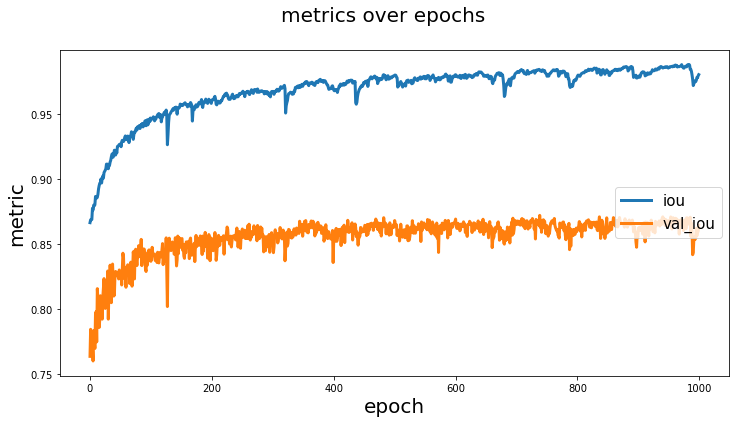

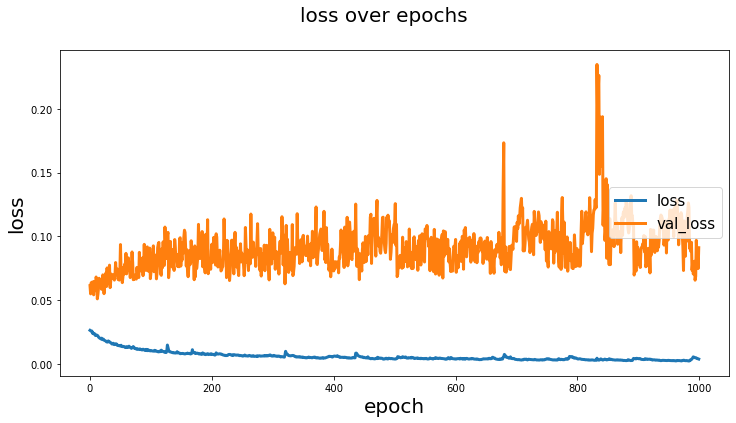

In [29]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [30]:
y_pred = model.predict(X_test)

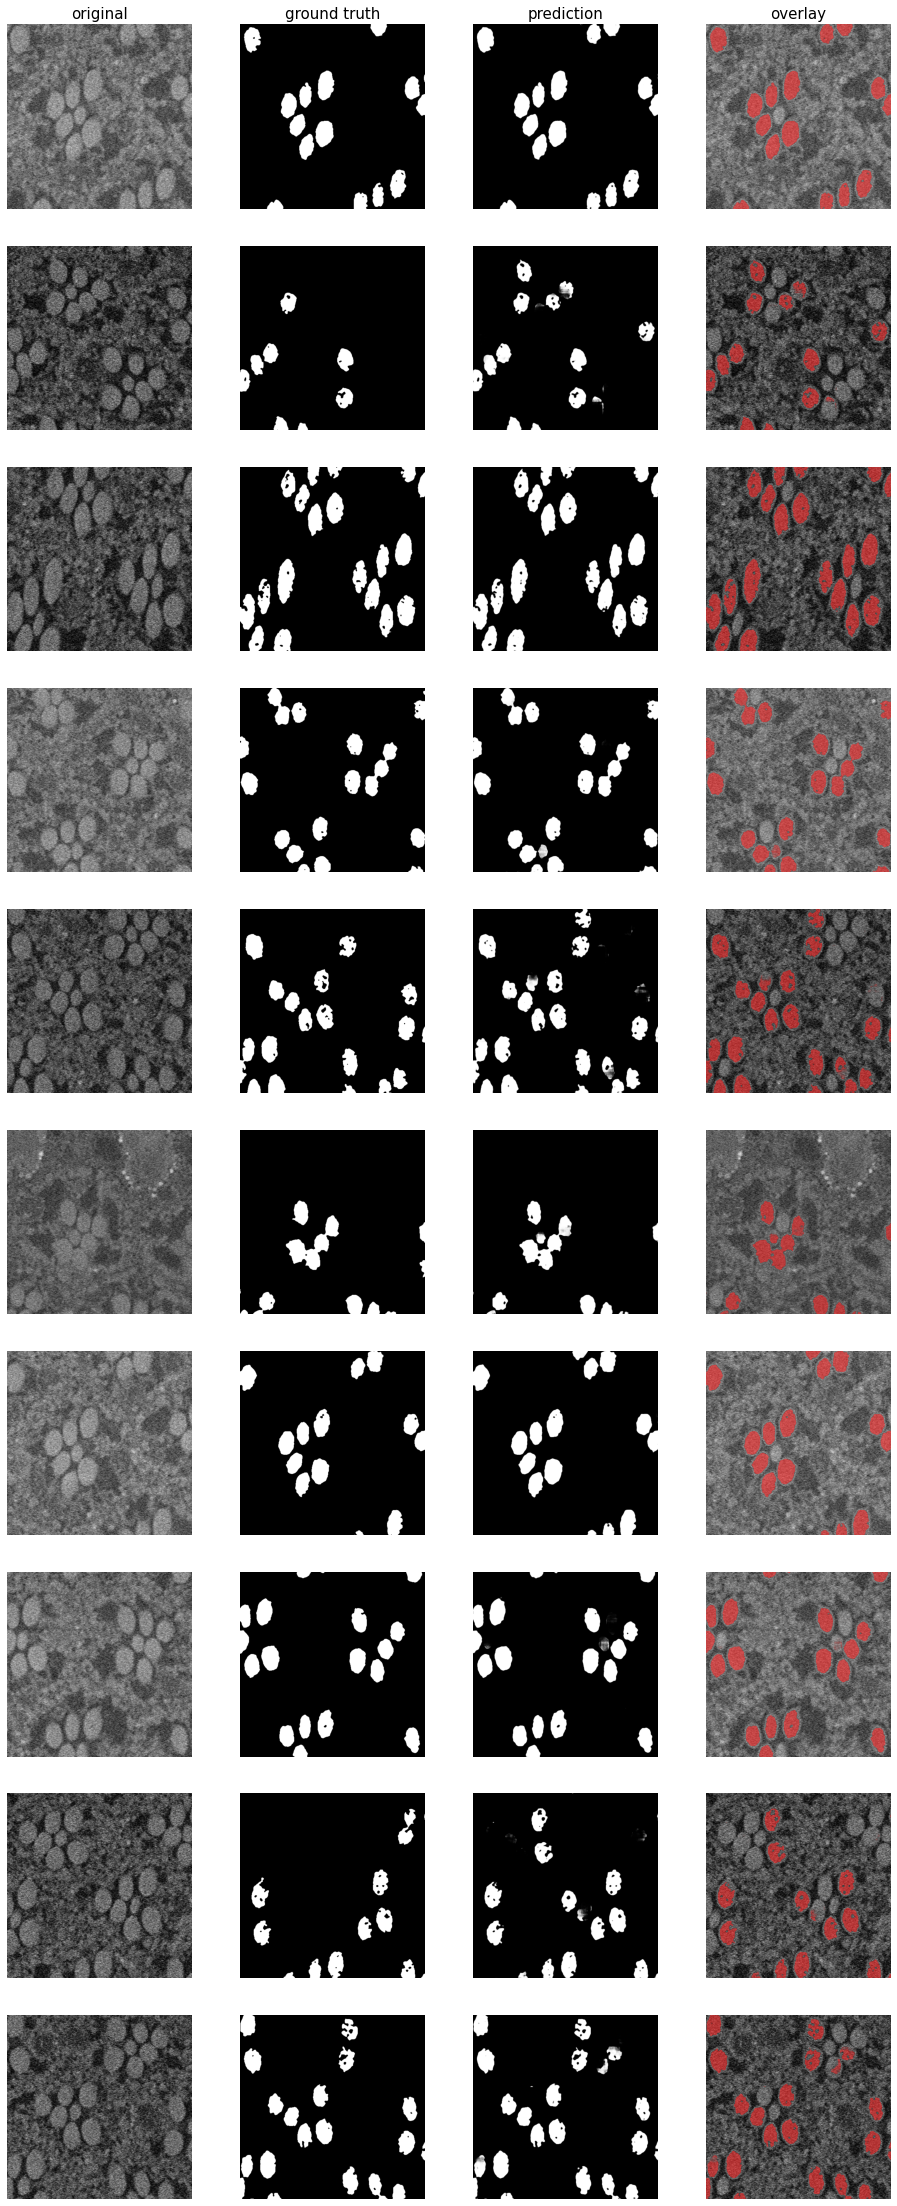

In [31]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=10)

Epoch 1/40
20/20 [==============================] - 16s 803ms/step - loss: 0.0507 - iou: 0.7570 - iou_thresholded: 0.8263 - val_loss: 0.0652 - val_iou: 0.6768 - val_iou_thresholded: 0.7575
Epoch 2/40
20/20 [==============================] - 15s 771ms/step - loss: 0.0505 - iou: 0.7587 - iou_thresholded: 0.8270 - val_loss: 0.0527 - val_iou: 0.7123 - val_iou_thresholded: 0.8208
Epoch 3/40
20/20 [==============================] - 15s 775ms/step - loss: 0.0501 - iou: 0.7607 - iou_thresholded: 0.8284 - val_loss: 0.0550 - val_iou: 0.7107 - val_iou_thresholded: 0.7911
Epoch 4/40
20/20 [==============================] - 15s 778ms/step - loss: 0.0495 - iou: 0.7625 - iou_thresholded: 0.8295 - val_loss: 0.0663 - val_iou: 0.6464 - val_iou_thresholded: 0.7452
Epoch 5/40
20/20 [==============================] - 16s 804ms/step - loss: 0.0485 - iou: 0.7652 - iou_thresholded: 0.8317 - val_loss: 0.0700 - val_iou: 0.6733 - val_iou_thresholded: 0.7486
Epoch 6/40
20/20 [==============================] - 16s

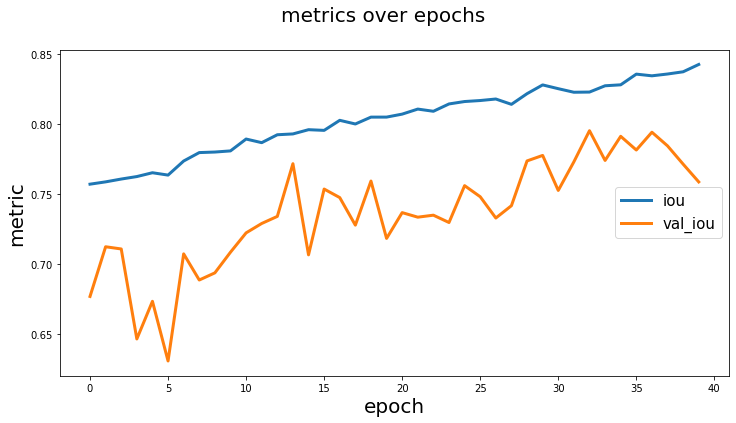

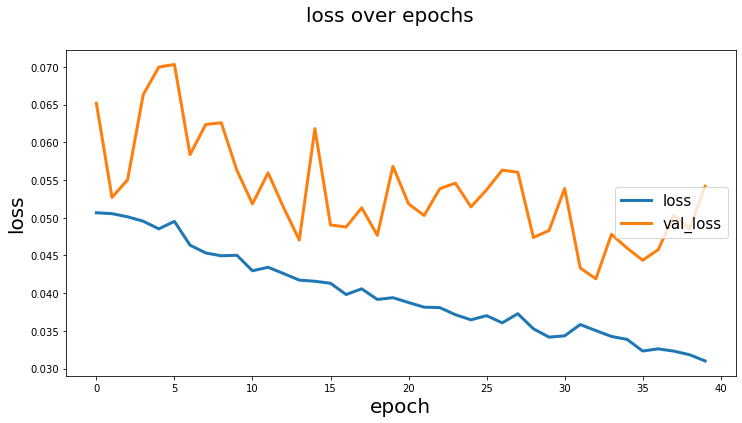

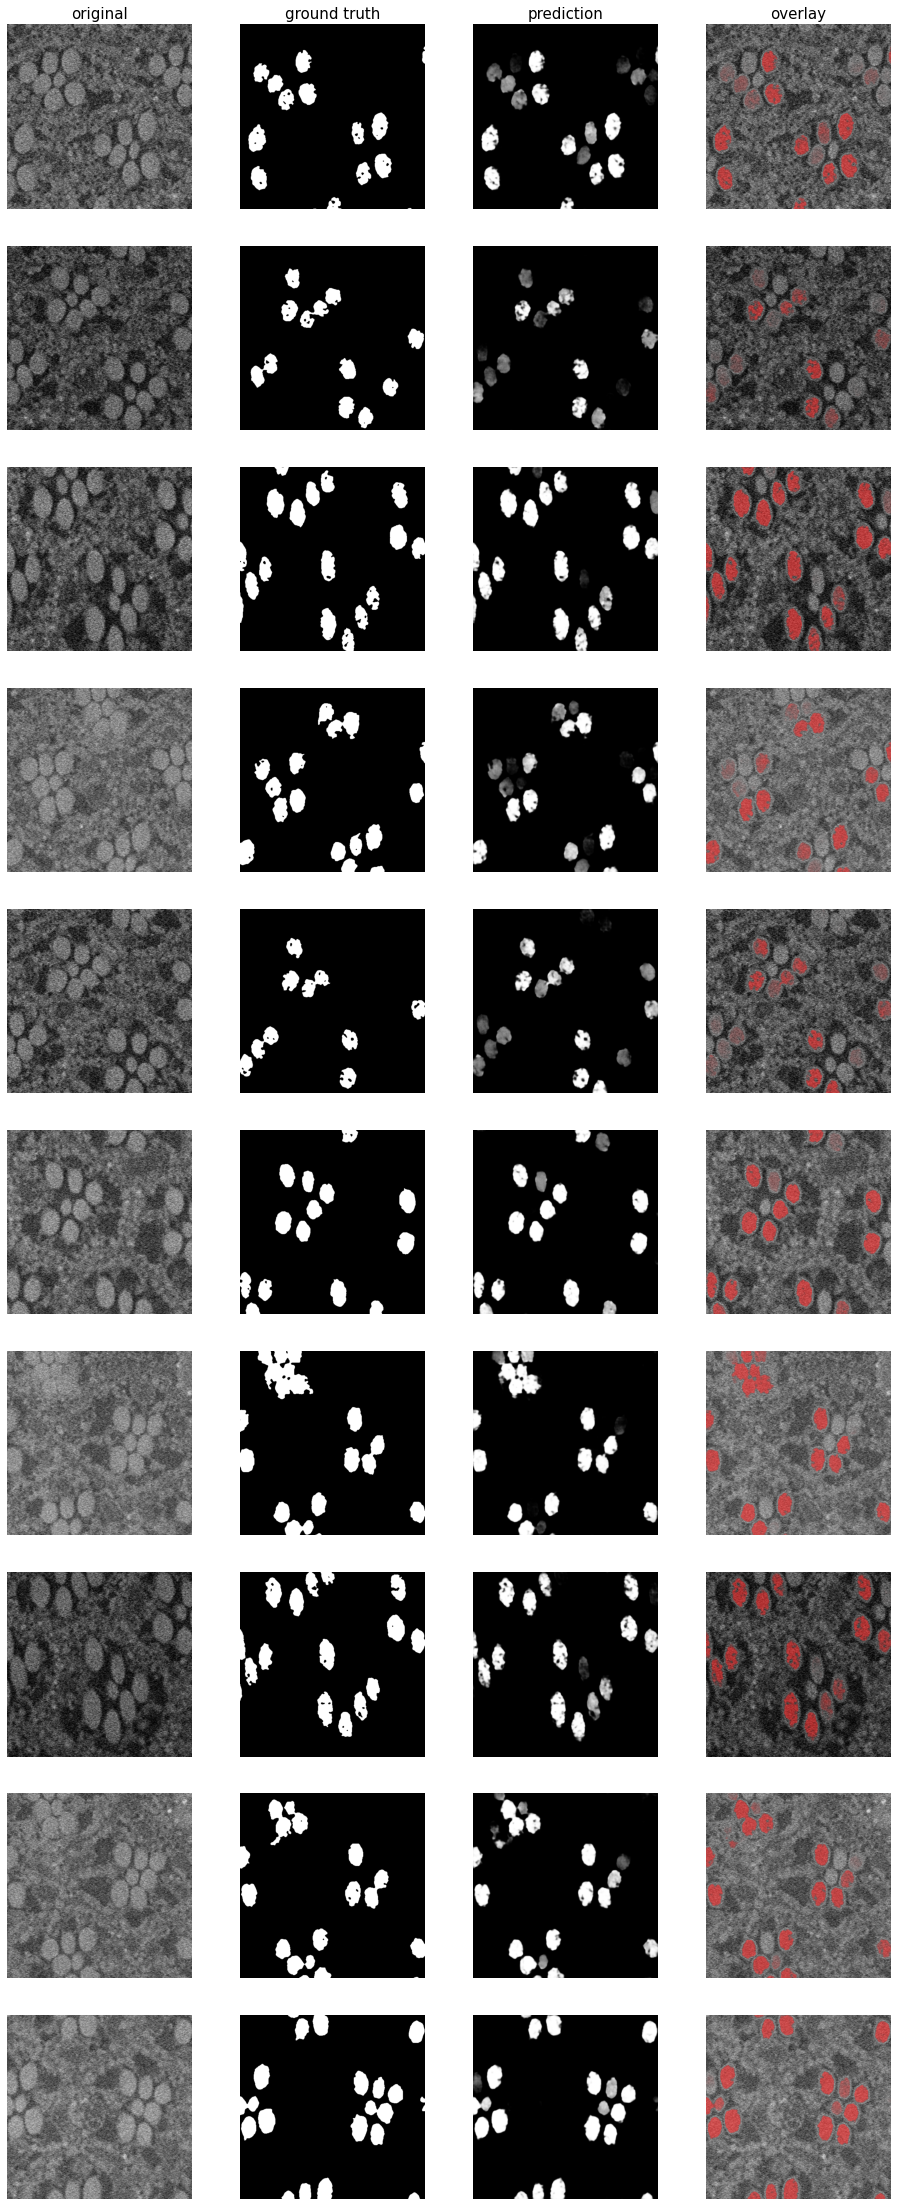

In [51]:
training(60,40)

In [ ]:
#help()

In [ ]:
training(65,65)

Epoch 1/65
19/19 [==============================] - 41s 2s/step - loss: 0.0315 - iou: 0.8408 - iou_thresholded: 0.8855 - val_loss: 0.0475 - val_iou: 0.7783 - val_iou_thresholded: 0.8348
Epoch 2/65
19/19 [==============================] - 18s 961ms/step - loss: 0.0308 - iou: 0.8424 - iou_thresholded: 0.8879 - val_loss: 0.0459 - val_iou: 0.8034 - val_iou_thresholded: 0.8513
Epoch 3/65
19/19 [==============================] - 18s 942ms/step - loss: 0.0313 - iou: 0.8424 - iou_thresholded: 0.8868 - val_loss: 0.0505 - val_iou: 0.7811 - val_iou_thresholded: 0.8291
Epoch 4/65
19/19 [==============================] - 18s 952ms/step - loss: 0.0295 - iou: 0.8485 - iou_thresholded: 0.8917 - val_loss: 0.0466 - val_iou: 0.7933 - val_iou_thresholded: 0.8425
Epoch 5/65
19/19 [==============================] - 18s 956ms/step - loss: 0.0291 - iou: 0.8514 - iou_thresholded: 0.8929 - val_loss: 0.0484 - val_iou: 0.7888 - val_iou_thresholded: 0.8382
Epoch 6/65
19/19 [==============================] - 18s 94

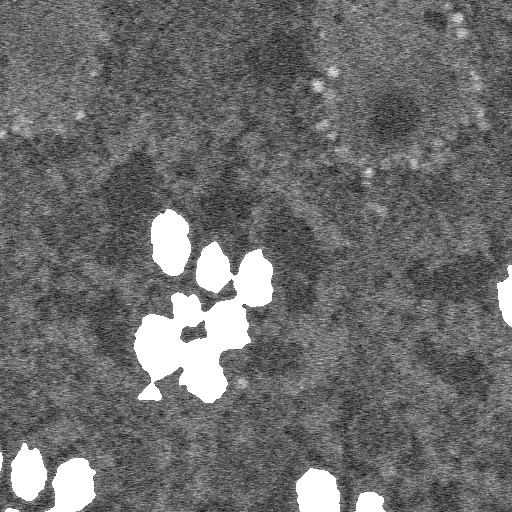

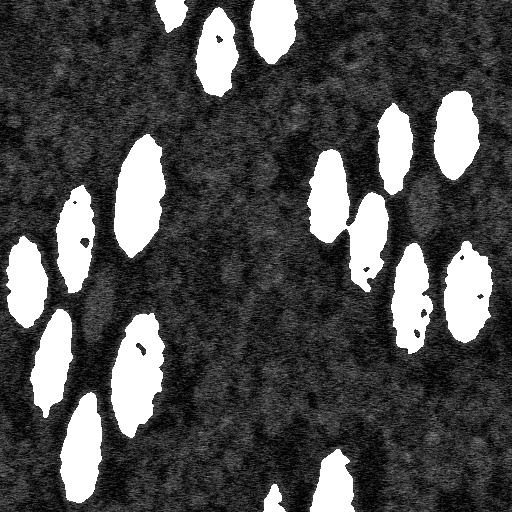

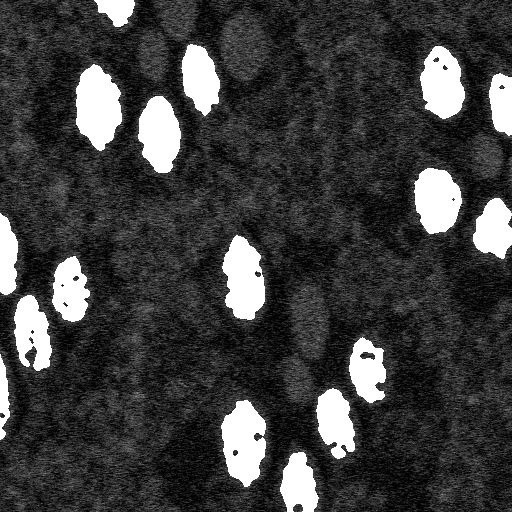

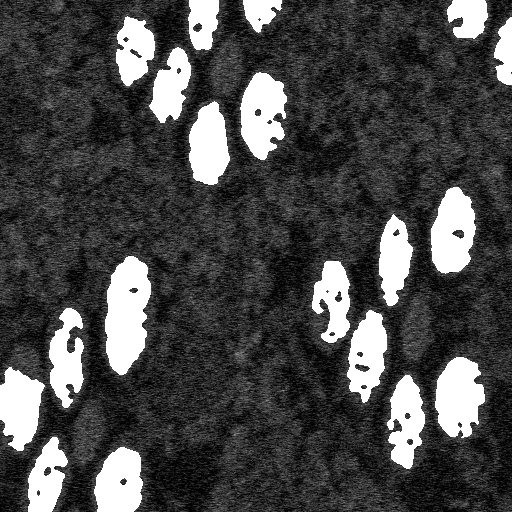

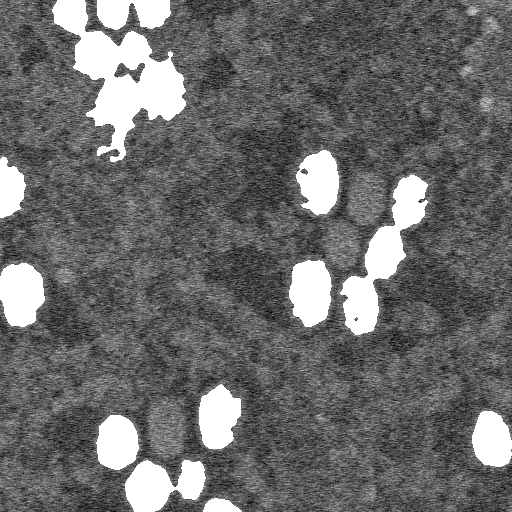

In [47]:
overlay(directories['originals'],directories['masks'], 5)

In [43]:
import os
import random
from PIL import Image

def overlay(original_dir, mask_dir, n):
    original_images = os.listdir(original_dir)
    mask_images = os.listdir(mask_dir)

    for i in range(n):
        original_image = random.choice(original_images)
        mask_image = original_image.replace('.png', '_mask.png')
        if mask_image in mask_images:
            img = Image.open(os.path.join(original_dir, original_image))
            mask = Image.open(os.path.join(mask_dir, mask_image))
            img.paste(mask, (0, 0), mask)
            img.show()
            #hint: # overlay_masks('original', 'masks', 3) - To plot overlay wiht masks



In [ ]:
# !pip install keras-unet

# import keras
# from keras_unet.models import custom_unet

# images_file = os.path.join(npy_files, 'original.npy')
# labels_file = os.path.join(npy_files, 'mask.npy')

# images = np.load(images_file)
# labels = np.load(labels_file)

# images.shape

# # full dataset does not have the last channel
# images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
# labels = labels.reshape(labels.shape[0],labels.shape[1],labels.shape[2],1)

# images.shape

# p = np.random.permutation(len(images))

# images = images[p]
# labels = labels[p]

# labels = labels.astype(np.float64)

# images = images.astype(np.float64)

# for i in range(images.shape[0]):
#     images[i] = (images[i] - images[i].min()) / (images[i].max() - images[i].min()) # normalize individually


# images.shape

# X_train = images[0:50]
# y_train = labels[0:50]
# X_val = images[10:20]
# y_val = labels[10:20]
# X_test = images[0:]
# y_test = labels[0:]

# model = custom_unet(
#     input_shape=(512, 512, 1),
#     use_batch_norm=False,
#     num_classes=1,
#     filters=32,
#     dropout=0.5,
#     output_activation='sigmoid')

# import keras.optimizers
# from keras_unet.metrics import iou, iou_thresholded
# from keras_unet.losses import jaccard_distance



# opt = keras.optimizer_v1.Adam(lr=0.01)

# model.compile(optimizer = 'Adam',    
#               loss='binary_crossentropy', 
#               metrics=[iou, iou_thresholded])

# history = model.fit(X_train, 
#                     y_train, 
#                     50, 
#                     epochs=500,
#                     validation_data=(X_val, y_val), 
#                     verbose=1)

# from keras_unet.utils import plot_segm_history

# plot_segm_history(history)

# y_pred = model.predict(X_test)

# from keras_unet.utils import plot_imgs

# plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=10)

In [ ]:
# My next idea in the pipe line is to compare same images on different iterations and come to conclusion.
# To decide what batch size and epochs gives the best results.